## Data Cleaning

### Imports 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read and explore Data.csv

In [48]:
df = pd.read_csv("../data/Data.csv")
df.head()

,Date,Target_Name,Target_Industry_Macro,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
0,14/08/2024,Sarsys-Asft AB,Industrials,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,2.88,"Measuring, Medical, Photo Equipment; Clocks",Public,"2,024.00",0.77,-12.55
1,08/08/2024,GSE Systems Inc,High Technology,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,13.17,Prepackaged Software,Public,"2,024.00",0.32,-12.91
2,06/08/2024,INEO Tech Corp,Consumer Products and Services,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,3.91,Business Services,Public,"2,024.00",3.97,-2.19
3,03/08/2024,Big Cheese Studio SA,High Technology,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,11.29,Prepackaged Software,Public,"2,024.00",4.16,10.72
4,01/08/2024,Braille Energy Systems Inc,Energy and Power,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,5.86,Electronic and Electrical Equipment,Public,"2,024.00",2.41,-4.33


In [49]:
df.dtypes

Date                         object
Target_Name                  object
Target_Industry_Macro        object
Target_Industry_Mid          object
Target_Nation                object
Buyer_Name                   object
Buyer_Industry_Macro         object
Buyer_Industry_Mid           object
Buyer_Nation                 object
Target_Revenues              object
Target_EBITDA                object
Target_EV                    object
Target_Industry_Detailed     object
Target_Status                object
Year                         object
EV_Rev                      float64
EV_EBITDA                   float64
dtype: object

### Change some objects into floats and ints

In [50]:
df['Target_Revenues']=df['Target_Revenues'].str.replace(',','')
df['Target_Revenues'] = df.Target_Revenues.astype(float)

df['Target_EBITDA']=df['Target_EBITDA'].str.replace(',','')
df['Target_EBITDA']=df.Target_EBITDA.astype(float)

df['Target_EV']=df['Target_EV'].str.replace(',','')
df['Target_EV']=df.Target_EV.astype(float)

df['Year']=df['Year'].str.replace(',','')
df['Year']=df.Year.astype(float)
df['Year']=df.Year.astype(int)

df.head()

,Date,Target_Name,Target_Industry_Macro,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,Target_EBITDA,Target_EV,Target_Industry_Detailed,Target_Status,Year,EV_Rev,EV_EBITDA
0,14/08/2024,Sarsys-Asft AB,Industrials,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,-0.23,2.88,"Measuring, Medical, Photo Equipment; Clocks",Public,2024,0.77,-12.55
1,08/08/2024,GSE Systems Inc,High Technology,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,-1.02,13.17,Prepackaged Software,Public,2024,0.32,-12.91
2,06/08/2024,INEO Tech Corp,Consumer Products and Services,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,-1.78,3.91,Business Services,Public,2024,3.97,-2.19
3,03/08/2024,Big Cheese Studio SA,High Technology,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,1.05,11.29,Prepackaged Software,Public,2024,4.16,10.72
4,01/08/2024,Braille Energy Systems Inc,Energy and Power,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,-1.35,5.86,Electronic and Electrical Equipment,Public,2024,2.41,-4.33


### Change 'Date' from 'object' to 'datetime'

In [51]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [52]:
#Double check dtypes
df.dtypes

Date                        datetime64[ns]
Target_Name                         object
Target_Industry_Macro               object
Target_Industry_Mid                 object
Target_Nation                       object
Buyer_Name                          object
Buyer_Industry_Macro                object
Buyer_Industry_Mid                  object
Buyer_Nation                        object
Target_Revenues                    float64
Target_EBITDA                      float64
Target_EV                          float64
Target_Industry_Detailed            object
Target_Status                       object
Year                                 int64
EV_Rev                             float64
EV_EBITDA                          float64
dtype: object

### Remove 'Government and Agencies' from Target Industry

In [53]:
df = df[df['Target_Industry_Macro'] != 'Government and Agencies']
df.shape

(14768, 17)

#### Remove Outliers

In [54]:
#Keep EV_Rev < 100
df = df[df['EV_Rev'] < 100]
#Keep EV_EBITDA >-100 and <500
df = df[df['EV_EBITDA'] > -100]
df = df[df['EV_EBITDA'] < 500]

df.shape

(14156, 17)

In [55]:
country_to_region = {
    'United States': 'North America',
    'Canada': 'North America',
    'Greenland': 'North America',
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Netherlands': 'Western Europe',
    'Belgium': 'Western Europe',
    'Luxembourg': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Austria': 'Western Europe',
    'Liechtenstein': 'Western Europe',
    'Monaco': 'Western Europe',
    'United Kingdom': 'UK',
    'Jersey': 'UK',
    'Guernsey': 'UK',
    'Isle of Man': 'UK',
    'Ireland': 'UK',
    'Sweden': 'Nordics',
    'Norway': 'Nordics',
    'Denmark': 'Nordics',
    'Finland': 'Nordics',
    'Iceland': 'Nordics',
    'Poland': 'Eastern Europe',
    'Bosnia and Herzegovina': 'Eastern Europe',
    'Lithuania': 'Eastern Europe',
    'Bulgaria': 'Eastern Europe',
    'Russia': 'Eastern Europe',
    'Estonia': 'Eastern Europe',
    'Latvia': 'Eastern Europe',
    'Hungary': 'Eastern Europe',
    'Romania': 'Eastern Europe',
    'Ukraine': 'Eastern Europe',
    'Moldova': 'Eastern Europe',
    'Serbia': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'North Macedonia': 'Eastern Europe',
    'Montenegro': 'Eastern Europe',
    'Slovakia': 'Eastern Europe',
    'Czech Republic': 'Eastern Europe',
    'Portugal': 'Southern Europe',
    'Italy': 'Southern Europe',
    'Spain': 'Southern Europe',
    'Greece': 'Southern Europe',
    'Croatia': 'Southern Europe',
    'Cyprus': 'Southern Europe',
    'Malta': 'Southern Europe',
    'Gibraltar': 'Southern Europe',
    'Turkey': 'Southern Europe'
}

# Apply the updated mapping to create a new column
df['Target_Region'] = df['Target_Nation'].map(country_to_region)

# One-hot encode the 'Target_Region' column
df = pd.get_dummies(df, columns=['Target_Region'])

# Display the updated dataframe
df.head()


,Date,Target_Name,Target_Industry_Macro,Target_Industry_Mid,Target_Nation,Buyer_Name,Buyer_Industry_Macro,Buyer_Industry_Mid,Buyer_Nation,Target_Revenues,...,Target_Status,Year,EV_Rev,EV_EBITDA,Target_Region_Eastern Europe,Target_Region_Nordics,Target_Region_North America,Target_Region_Southern Europe,Target_Region_UK,Target_Region_Western Europe
0,2024-08-14,Sarsys-Asft AB,Industrials,Other Industrials,Sweden,Grundbulten 137100 AB,Financials,Other Financials,Sweden,3.76,...,Public,2024,0.77,-12.55,0,1,0,0,0,0
1,2024-08-08,GSE Systems Inc,High Technology,Software,United States,Nuclear Engineering Holdings LLC,Financials,Other Financials,United States,41.81,...,Public,2024,0.32,-12.91,0,0,1,0,0,0
2,2024-08-06,INEO Tech Corp,Consumer Products and Services,Professional Services,Canada,Coenda Investment Holdings Corp,Financials,Other Financials,Canada,0.98,...,Public,2024,3.97,-2.19,0,0,1,0,0,0
3,2024-08-03,Big Cheese Studio SA,High Technology,Software,Poland,Investor Group,Financials,Other Financials,Poland,2.71,...,Public,2024,4.16,10.72,1,0,0,0,0,0
4,2024-08-01,Braille Energy Systems Inc,Energy and Power,Other Energy & Power,Canada,Undisclosed Acquiror,Financials,Brokerage,Unknown,2.43,...,Public,2024,2.41,-4.33,0,0,1,0,0,0


In [56]:
# HOT ENCONDER COUNTRY

from sklearn.preprocessing import OneHotEncoder

data = df

encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(df[['Target_Industry_Macro']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Target_Industry_Macro']))
encoded_df = encoded_df.astype(int)

df_encoded = pd.concat([df, encoded_df], axis=1)

df= df_encoded

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14756 entries, 0 to 14148
Data columns (total 36 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Date                                                  14156 non-null  datetime64[ns]
 1   Target_Name                                           14154 non-null  object        
 2   Target_Industry_Macro                                 14154 non-null  object        
 3   Target_Industry_Mid                                   14154 non-null  object        
 4   Target_Nation                                         14154 non-null  object        
 5   Buyer_Name                                            14154 non-null  object        
 6   Buyer_Industry_Macro                                  14154 non-null  object        
 7   Buyer_Industry_Mid                                    14154 non-null  object

Graphs

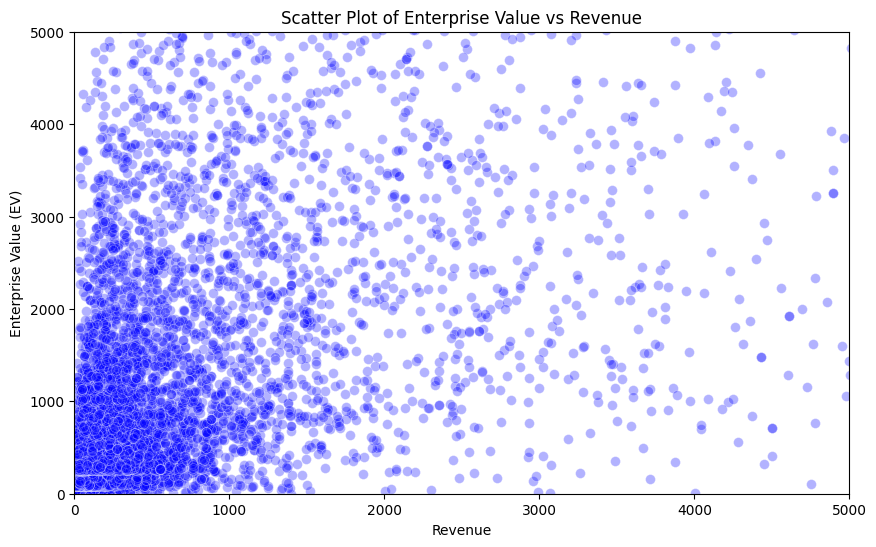

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Target_Revenues'], y=df['Target_EV'], alpha=0.3, color='blue', s=50)

plt.xlabel('Revenue')
plt.ylabel('Enterprise Value (EV)')
plt.title('Scatter Plot of Enterprise Value vs Revenue')

plt.xlim(0, 5000)  # Example x-axis limits
plt.ylim(0, 5000)  # Example y-axis limits

plt.show()

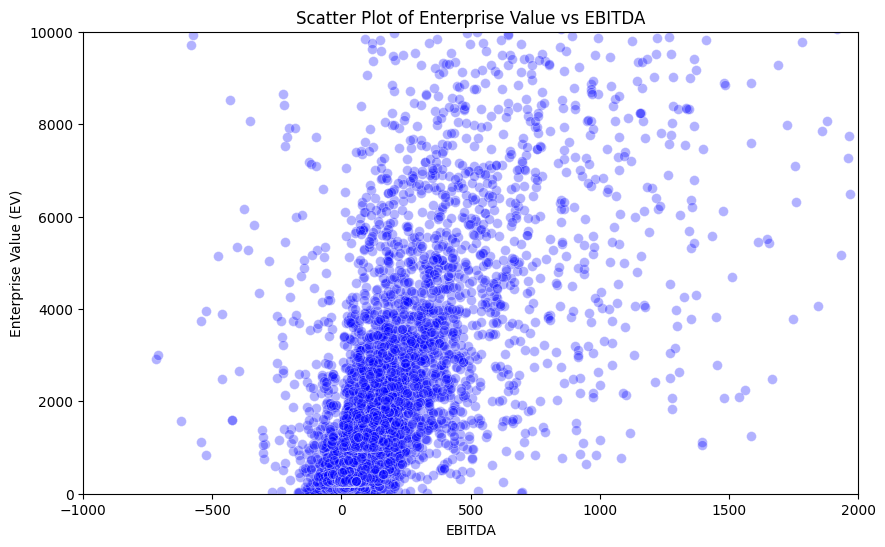

In [58]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=df['Target_EBITDA'], y=df['Target_EV'], alpha=0.3, color='blue', s=50)

plt.xlabel('EBITDA')
plt.ylabel('Enterprise Value (EV)')
plt.title('Scatter Plot of Enterprise Value vs EBITDA')

plt.xlim(-1000, 2000)  # Example x-axis limits
plt.ylim(0, 10000)  # Example y-axis limits

plt.show()